# Évolution des sondages pour la présidentielle française de 2022

In [60]:
import pandas as pd
import datetime
z=pd.read_csv("https://github.com/nsppolls/nsppolls/raw/master/presidentielle.csv")
#display(z)
z["date"]=pd.to_datetime(z.fin_enquete)
z=z[z.tour=="Premier tour"][["date","candidat","intentions"]]
z=pd.pivot_table(z, index=['date'], columns='candidat', values='intentions') # mise en forme
z=z.reset_index()

In [61]:
liste_retenue=['Anne Hidalgo', 'Emmanuel Macron','Eric Zemmour', 'Fabien Roussel', 'Jean Lassalle','Jean-Luc Mélenchon', 'Marine Le Pen','Nathalie Arthaud', 'Nicolas Dupont-Aignan', 'Philippe Poutou', 'Valérie Pécresse', 'Yannick Jadot']
len(liste_retenue)

12

In [62]:
z=z[z.date>datetime.datetime(2022,1,1)].set_index("date")
z=z[liste_retenue]
z['tot']=z.sum(axis=1)
# renormalisation pour les seuls retenus
for c in z.columns:
    if c=='tot':
        continue
    z[c]=z[c]/z.tot*100

In [63]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)    
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

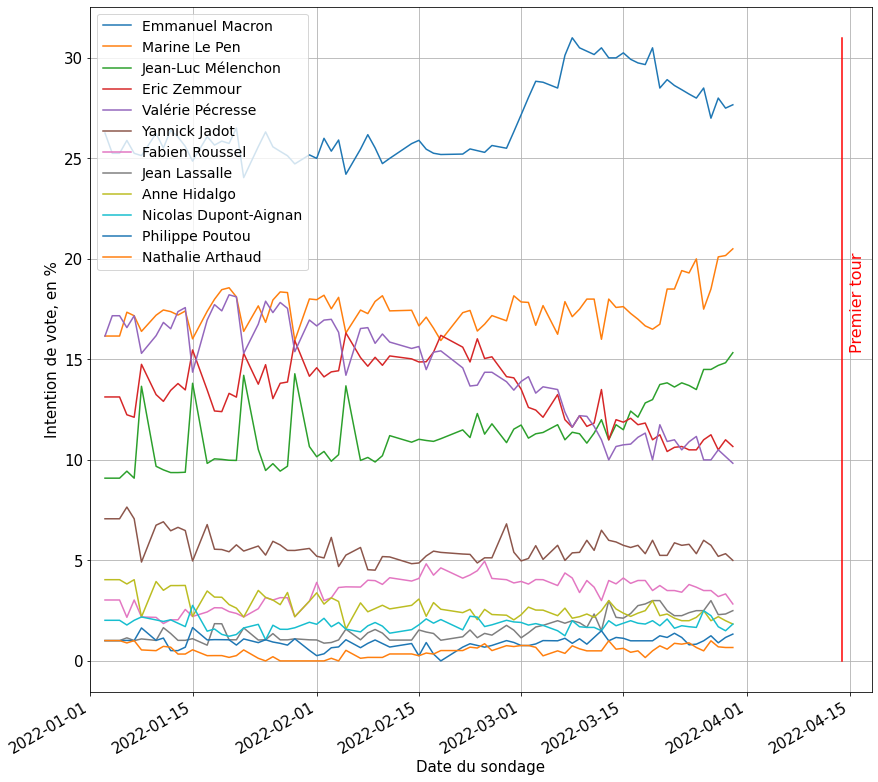

In [74]:
# ordonnancement en fonction des dernières intensions de vote
liste_ordonnee=list(z[z.index==z.index.max()][liste_retenue].transpose().sort_values(by=z.index.max(),ascending=False).index)

ax=z[liste_ordonnee].plot(figsize=(14,14))
ax.legend(loc='upper left')

ax.set_ylabel('Intention de vote, en %')
ax.set_xlabel('Date du sondage')

ax.set_xlim(datetime.datetime(2022,1,1),datetime.datetime(2022,4,18))
date_scrutin=datetime.datetime(2022,4,14)
maxn=z[liste_ordonnee[0]].max()
ax.plot([date_scrutin,date_scrutin],[0,maxn],'r-')
ax.text(date_scrutin+datetime.timedelta(days=1),maxn/2,'Premier tour',rotation='vertical',color='red',fontsize=16)

ax.grid()